<a href="https://colab.research.google.com/github/muskansinghal26/Analysis-of-Treatment-Quality-and-Efficiency-of-Hospitals/blob/main/Case_study_Analysis%20of%20Treatment%20Quality%20and%20Efficiency%20of%20Hospitals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study
#Project Report: Analysis of Treatment Quality and Efficiency of Hospitals

1. **State Machine Learning Algorithms** that can be used to train the data:
Given the objective of analyzing treatment quality and efficiency, and the data characteristics provided, several machine learning algorithms can be used. Here are some potential algorithms to consider:

a. **Linear Regression**: Useful for predicting continuous variables like length of stay based on other features.

b.**Logistic Regression** : Suitable for binary classification tasks like predicting hospitalization indicators.

c. **Decision Trees**: Effective for classification tasks and can handle both categorical and numerical features.

d. **Random Forest**: Ensemble method combining multiple decision trees for improved accuracy and robustness.

e. **Support Vector Machines (SVM)**: Effective for classification tasks and can handle high-dimensional data.

f. **Gradient Boosting**: Ensemble technique to combine multiple weak learners for improved accuracy.

g. **Neural Networks**: Useful for complex patterns and non-linear relationships, especially with large datasets.

The specific choice of algorithms will depend on the nature of the data, the type of analysis required, and the performance evaluation metrics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
df = files.upload()

Saving sparcs1 (1) - sparcs1 (1).csv to sparcs1 (1) - sparcs1 (1).csv


In [ ]:
data = pd.read_csv('sparcs1 (1) - sparcs1 (1).csv')
print(data.columns)

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Age Group',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'CCS Procedure Description', 'APR Severity of Illness Code',
       'APR Risk of Mortality', 'Source of Payment 1', 'Total Costs'],
      dtype='object')


In [ ]:
data.shape

(19999, 13)

In [ ]:
data.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1,Total Costs
0,New York City,Manhattan,7002054.0,1458.0,0 to 17,2,Newborn,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company,"1,685.18"
1,New York City,Manhattan,7002054.0,1458.0,0 to 17,4,Emergency,Cancer Center or Children's Hospital,RESP INTUB/MECH VENTIL,2,Major,Insurance Company,"17,394.94"
2,New York City,Manhattan,7002054.0,1464.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross,"1,818.44"
3,Southern Tier,Tompkins,5401001.0,977.0,0 to 17,2,Newborn,Home or Self Care,PROPHYLACTIC VAC/INOCUL,2,Minor,Blue Cross,"1,024.48"
4,New York City,Bronx,7000014.0,1176.0,0 to 17,3,Emergency,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Self-Pay,"3,238.19"


In [ ]:
data.describe()

,Operating Certificate Number,Facility ID,APR Severity of Illness Code
count,1.999400e+04,19994.000000,19999.000000
mean,6.968105e+06,1574.881414,1.382419
std,3.611114e+05,570.057810,0.669259
min,1.010000e+05,1.000000,0.000000
25%,7.002017e+06,1450.000000,1.000000
50%,7.002032e+06,1458.000000,1.000000
75%,7.002054e+06,1464.000000,2.000000
max,7.004010e+06,3975.000000,4.000000


In [ ]:
data.sample(5)

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1,Total Costs
19377,New York City,Manhattan,7002054.0,1458.0,0 to 17,1,Emergency,Home or Self Care,OTHER RESP THERAPY,1,Minor,Insurance Company,"3,531.24"
1010,New York City,Manhattan,7002053.0,1463.0,50 to 69,1,Emergency,Home or Self Care,CARDIAC STRESS TESTS,2,Minor,Medicaid,"5,544.54"
16785,New York City,Manhattan,7002054.0,1464.0,0 to 17,17,Emergency,Home or Self Care,NO PROC,2,Minor,Insurance Company,"31,050.99"
15005,New York City,Manhattan,7002054.0,1458.0,0 to 17,2,Newborn,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company,"1,582.16"
15155,New York City,Manhattan,7002053.0,1463.0,0 to 17,2,Newborn,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Insurance Company,"8,246.41"


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Operating Certificate Number,19994.0,6.968105e+06,361111.424700,101000.0,7002017.0,7002032.0,7002054.0,7004010.0
Facility ID,19994.0,1.574881e+03,570.057810,1.0,1450.0,1458.0,1464.0,3975.0
APR Severity of Illness Code,19999.0,1.382419e+00,0.669259,0.0,1.0,1.0,2.0,4.0


In [ ]:
data.drop(['Total Costs'], axis = 1, inplace = True)
data.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,New York City,Manhattan,7002054.0,1458.0,0 to 17,2,Newborn,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company
1,New York City,Manhattan,7002054.0,1458.0,0 to 17,4,Emergency,Cancer Center or Children's Hospital,RESP INTUB/MECH VENTIL,2,Major,Insurance Company
2,New York City,Manhattan,7002054.0,1464.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross
3,Southern Tier,Tompkins,5401001.0,977.0,0 to 17,2,Newborn,Home or Self Care,PROPHYLACTIC VAC/INOCUL,2,Minor,Blue Cross
4,New York City,Bronx,7000014.0,1176.0,0 to 17,3,Emergency,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Self-Pay


In [ ]:
data.drop(['Hospital County'], axis = 1, inplace = True)
data.head()

,Health Service Area,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,New York City,7002054.0,1458.0,0 to 17,2,Newborn,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company
1,New York City,7002054.0,1458.0,0 to 17,4,Emergency,Cancer Center or Children's Hospital,RESP INTUB/MECH VENTIL,2,Major,Insurance Company
2,New York City,7002054.0,1464.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross
3,Southern Tier,5401001.0,977.0,0 to 17,2,Newborn,Home or Self Care,PROPHYLACTIC VAC/INOCUL,2,Minor,Blue Cross
4,New York City,7000014.0,1176.0,0 to 17,3,Emergency,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Self-Pay


In [ ]:
data.drop(['Operating Certificate Number'], axis = 1, inplace = True)
data.head()

,Health Service Area,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,New York City,1458.0,0 to 17,2,Newborn,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company
1,New York City,1458.0,0 to 17,4,Emergency,Cancer Center or Children's Hospital,RESP INTUB/MECH VENTIL,2,Major,Insurance Company
2,New York City,1464.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross
3,Southern Tier,977.0,0 to 17,2,Newborn,Home or Self Care,PROPHYLACTIC VAC/INOCUL,2,Minor,Blue Cross
4,New York City,1176.0,0 to 17,3,Emergency,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Self-Pay


In [ ]:
data.tail()

,Health Service Area,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
19994,New York City,1456.0,0 to 17,4,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Insurance Company
19995,New York City,1456.0,0 to 17,2,Newborn,Home or Self Care,OTHER THERAPEUTIC PRCS,1,Minor,Blue Cross
19996,New York City,1456.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Insurance Company
19997,New York City,1456.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Insurance Company
19998,New York City,1456.0,0 to 17,1,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Insurance Company


In [ ]:
print("dimension of sparcs data: {}".format(data.shape))

dimension of sparcs data: (19999, 10)


In [ ]:
data.isnull().sum()

Health Service Area             5
Facility ID                     5
Age Group                       0
Length of Stay                  0
Type of Admission               0
Patient Disposition             4
CCS Procedure Description       0
APR Severity of Illness Code    0
APR Risk of Mortality           3
Source of Payment 1             0
dtype: int64

In [ ]:
data = data.dropna(subset=['Health Service Area', 'APR Risk of Mortality','Facility ID','Patient Disposition'])

In [ ]:
data.isnull().sum()

Health Service Area             0
Facility ID                     0
Age Group                       0
Length of Stay                  0
Type of Admission               0
Patient Disposition             0
CCS Procedure Description       0
APR Severity of Illness Code    0
APR Risk of Mortality           0
Source of Payment 1             0
dtype: int64

In [ ]:
print(data.groupby('APR Severity of Illness Code').size())

APR Severity of Illness Code
1    14192
2     4206
3     1327
4      262
dtype: int64


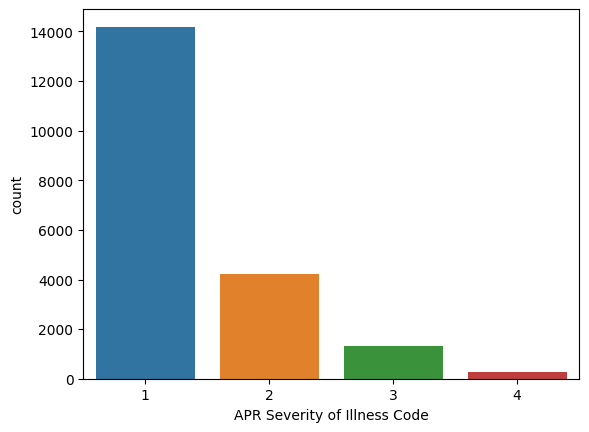

In [ ]:
import seaborn as sns
sns.countplot(data=data, x='APR Severity of Illness Code', label='Illness Code Count')
plt.show()

<Axes: ylabel='count'>

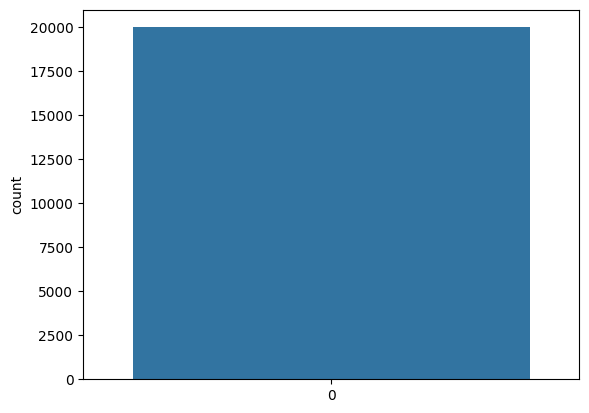

In [ ]:
import seaborn as sns
sns.countplot(data['APR Severity of Illness Code'],label="Count")

In [ ]:
data.shape

(19987, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19987 entries, 0 to 19998
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Health Service Area           19987 non-null  object 
 1   Facility ID                   19987 non-null  float64
 2   Age Group                     19987 non-null  object 
 3   Length of Stay                19987 non-null  object 
 4   Type of Admission             19987 non-null  object 
 5   Patient Disposition           19987 non-null  object 
 6   CCS Procedure Description     19987 non-null  object 
 7   APR Severity of Illness Code  19987 non-null  int64  
 8   APR Risk of Mortality         19987 non-null  object 
 9   Source of Payment 1           19987 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.2+ MB


In [ ]:
data.apply(lambda cols : cols.unique() )

Health Service Area             [New York City, Southern Tier, Hudson Valley, ...
Facility ID                     [1458.0, 1464.0, 977.0, 1176.0, 1302.0, 1306.0...
Age Group                       [0 to 17, 18 to 29, 30 to 49, 70 or Older, 50 ...
Length of Stay                  [2, 4, 3, 15, 1, 35, 5, 8, 6, 16, 7, 23, 11, 2...
Type of Admission               [Newborn, Emergency, Elective, Urgent, Not Ava...
Patient Disposition             [Home or Self Care, Cancer Center or Children'...
CCS Procedure Description       [CIRCUMCISION, RESP INTUB/MECH VENTIL, OPHTHAL...
APR Severity of Illness Code                                         [1, 2, 3, 4]
APR Risk of Mortality                           [Minor, Major, Moderate, Extreme]
Source of Payment 1             [Insurance Company, Blue Cross, Self-Pay, Medi...
dtype: object

In [ ]:
data[data['Health Service Area']=='nan']

,Health Service Area,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1


In [ ]:
(data["Type of Admission"])

0          Newborn
1        Emergency
2          Newborn
3          Newborn
4        Emergency
           ...    
19994      Newborn
19995      Newborn
19996      Newborn
19997      Newborn
19998      Newborn
Name: Type of Admission, Length: 19987, dtype: object

In [ ]:
data.head()

,Health Service Area,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,New York City,1458.0,0 to 17,2,2,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company
1,New York City,1458.0,0 to 17,4,1,Cancer Center or Children's Hospital,RESP INTUB/MECH VENTIL,2,Major,Insurance Company
2,New York City,1464.0,0 to 17,2,2,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross
3,Southern Tier,977.0,0 to 17,2,2,Home or Self Care,PROPHYLACTIC VAC/INOCUL,2,Minor,Blue Cross
4,New York City,1176.0,0 to 17,3,1,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Self-Pay


Need to change from string to int by using label encoder


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19987 entries, 0 to 19998
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Health Service Area           19987 non-null  object 
 1   Facility ID                   19987 non-null  float64
 2   Age Group                     19987 non-null  object 
 3   Length of Stay                19987 non-null  object 
 4   Type of Admission             19987 non-null  int64  
 5   Patient Disposition           19987 non-null  object 
 6   CCS Procedure Description     19987 non-null  int64  
 7   APR Severity of Illness Code  19987 non-null  int64  
 8   APR Risk of Mortality         19987 non-null  object 
 9   Source of Payment 1           19987 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.2+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["Type of Admission"]=le.fit_transform(data["Type of Admission"])

In [ ]:
(data["Type of Admission"])

0        2
1        1
2        2
3        2
4        1
        ..
19994    2
19995    2
19996    2
19997    2
19998    2
Name: Type of Admission, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["CCS Procedure Description"]=le.fit_transform(data["CCS Procedure Description"])

In [ ]:
data["CCS Procedure Description"]

0         22
1        171
2         94
3        163
4         32
        ... 
19994     94
19995    154
19996     94
19997     94
19998     94
Name: CCS Procedure Description, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["APR Risk of Mortality"]=le.fit_transform(data["APR Risk of Mortality"])

In [ ]:
data["APR Risk of Mortality"]

0        2
1        1
2        2
3        2
4        2
        ..
19994    2
19995    2
19996    2
19997    2
19998    2
Name: APR Risk of Mortality, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["Health Service Area"]=le.fit_transform(data["Health Service Area"])

In [ ]:
data["Health Service Area"]

0        4
1        4
2        4
3        5
4        4
        ..
19994    4
19995    4
19996    4
19997    4
19998    4
Name: Health Service Area, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["Age Group"]=le.fit_transform(data["Age Group"])

In [ ]:
data["Age Group"]

0        0
1        0
2        0
3        0
4        0
        ..
19994    0
19995    0
19996    0
19997    0
19998    0
Name: Age Group, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["Length of Stay"]=le.fit_transform(data["Length of Stay"])

In [ ]:
data["Length of Stay"]

0        20
1        42
2        20
3        20
4        31
         ..
19994    42
19995    20
19996    20
19997    20
19998     0
Name: Length of Stay, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["Patient Disposition"]=le.fit_transform(data["Patient Disposition"])

In [ ]:
data["Patient Disposition"]

0        5
1        1
2        5
3        5
4        5
        ..
19994    5
19995    5
19996    5
19997    5
19998    5
Name: Patient Disposition, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["Source of Payment 1"]=le.fit_transform(data["Source of Payment 1"])

In [ ]:
data["Source of Payment 1"]

0        2
1        2
2        0
3        0
4        7
        ..
19994    2
19995    0
19996    2
19997    2
19998    2
Name: Source of Payment 1, Length: 19987, dtype: int64

In [ ]:
data.head()

,Health Service Area,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,4,1458.0,0,20,2,5,22,1,2,2
1,4,1458.0,0,42,1,1,171,2,1,2
2,4,1464.0,0,20,2,5,94,1,2,0
3,5,977.0,0,20,2,5,163,2,2,0
4,4,1176.0,0,31,1,5,32,2,2,7


Split the dataset for train the model

In [ ]:
X = data.drop(['Type of Admission'],axis = 1)  #independent variable
y = data['Type of Admission'] #dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =38)


In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("----------------------------------------")
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (15989, 9)
Shape of X_test:  (3998, 9)
----------------------------------------
Shape of y_train:  (15989,)
Shape of y_test:  (3998,)


In [ ]:
X_train.head()

,Health Service Area,Facility ID,Age Group,Length of Stay,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
3368,4,1439.0,0,20,5,91,1,2,2
5505,4,1458.0,0,0,5,97,1,2,2
17534,4,3975.0,0,31,5,94,1,2,2
2250,4,1464.0,0,20,5,163,1,2,3
552,4,1178.0,2,0,5,91,2,2,3


In [ ]:
y_train.head()

16811    2
12671    1
842      1
6073     2
7768     2
Name: Type of Admission, dtype: int64

In [ ]:
data.head()

,Health Service Area,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,4,1458.0,0,20,2,5,22,1,2,2
1,4,1458.0,0,42,1,1,171,2,1,2
2,4,1464.0,0,20,2,5,94,1,2,0
3,5,977.0,0,20,2,5,163,2,2,0
4,4,1176.0,0,31,1,5,32,2,2,7


# 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#creating a logistic regression object
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)
# calculate accuracy#
print("Training set accuracy: {:.3f}".format(logmodel.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logmodel.score(X_test, y_test)))

Training set accuracy: 0.641
Test set accuracy: 0.641


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Linear Model

In [ ]:
from sklearn import linear_model

#Crating A linear Regression Object
lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_train, y_train)

# calculate accuracy#
print("Linear Regression:Training set accuracy: {:.3f}".format(lin_reg.score(X_train, y_train)))
print("Linear Regression:Test set accuracy: {:.3f}".format(lin_reg.score(X_test, y_test)))

Linear Regression:Training set accuracy: 0.099
Linear Regression:Test set accuracy: 0.097


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.879


In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.713
Accuracy on test set: 0.711


#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gnb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gnb.score(X_test, y_test)))

Accuracy on training set: 0.513
Accuracy on test set: 0.512


In [ ]:
y_pred =logmodel.predict(X_test)

In [ ]:
y_pred[:20]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# predict model using Decision Tree
dtr_y_pred =tree.predict(X_test)

In [ ]:
dtr_y_pred[:20]

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2])

In [ ]:
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[   0,    6,  257,    0],
       [   0,   16, 1071,    1],
       [   0,    1, 2546,    0],
       [   0,    2,   98,    0]])

In [ ]:
confusion_matrix(y_test,dtr_y_pred)

array([[  67,  103,   93,    0],
       [  27,  366,  695,    0],
       [   0,  137, 2410,    0],
       [  20,   31,   49,    0]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.64      0.01      0.03      1088
           2       0.64      1.00      0.78      2547
           4       0.00      0.00      0.00       100

    accuracy                           0.64      3998
   macro avg       0.32      0.25      0.20      3998
weighted avg       0.58      0.64      0.51      3998



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f\n" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.63



**Feature** **Importance in Decision Tress**

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.09210713 0.29699865 0.36108895 0.         0.025198
 0.19901462 0.         0.02559265]


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.885


In [ ]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.728
Accuracy on test set: 0.726


#KNN Algorithm

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sparcs.loc[:, sparcs.columns != 'Type of Admission'], sparcs['Type of Admission'],
                                                    stratify=sparcs['Type of Admission'], random_state=66)


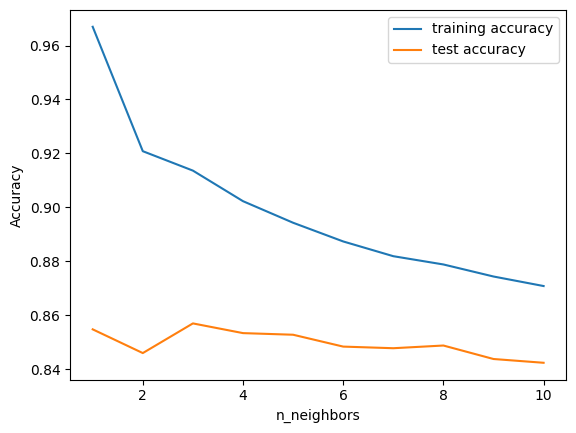

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

#SVM = Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.64
Accuracy on test set: 0.64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.73
Accuracy on test set: 0.72


In [ ]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.775
Accuracy on test set: 0.523


#Netural Network

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [ ]:
(X_train.shape,y_train.shape)

((15989, 9), (15989,))

In [ ]:
print(X_train)

[[0.66666667 0.36663312 0.         ... 0.         0.66666667 0.        ]
 [0.66666667 0.3686462  0.         ... 0.33333333 1.         0.25      ]
 [0.66666667 0.36789129 0.         ... 0.         0.66666667 0.25      ]
 ...
 [0.66666667 0.3616004  0.         ... 0.         0.66666667 0.25      ]
 [0.66666667 0.36663312 0.         ... 0.33333333 0.66666667 0.        ]
 [0.66666667 0.36990438 0.         ... 0.         0.66666667 0.25      ]]


In [ ]:
import tensorflow as tf
from keras.models import Sequential # It is linear stack of layers)
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu', input_shape=(X_train.shape[1], )),   #
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.variables

[<tf.Variable 'dense_2/kernel:0' shape=(9, 4) dtype=float32, numpy=
 array([[ 0.5269809 , -0.00313807,  0.60354006, -0.57761186],
        [-0.2968654 ,  0.02381676,  0.6584506 ,  0.21616048],
        [ 0.3264693 , -0.39725384,  0.26167572, -0.1377747 ],
        [-0.66988397, -0.5472668 ,  0.60795224,  0.23086053],
        [-0.00953311,  0.57129765,  0.22153479,  0.5182204 ],
        [-0.06367469,  0.3384173 ,  0.3215506 , -0.02730304],
        [ 0.6498699 ,  0.03386849,  0.3480233 , -0.22227758],
        [-0.3418678 , -0.19490293, -0.30577964,  0.19385254],
        [ 0.45264542,  0.17556393, -0.17340416,  0.04856145]],
       dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[ 0.31290615],
        [-0.31448907],
        [ 0.136343  ],
        [-1.0409099 ]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=arra

In [ ]:
# Compiling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
500/500 [==============================] - 2s 3ms/step - loss: -1.1641 - accuracy: 0.2724 - val_loss: -1231.8408 - val_accuracy: 0.2729
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: -7.3723 - accuracy: 0.2728 - val_loss: -5053.1318 - val_accuracy: 0.2729
Epoch 3/10
500/500 [==============================] - 1s 3ms/step - loss: -19.2158 - accuracy: 0.2728 - val_loss: -11313.8398 - val_accuracy: 0.2729
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: -36.3247 - accuracy: 0.2728 - val_loss: -19602.8730 - val_accuracy: 0.2729
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: -57.8502 - accuracy: 0.2728 - val_loss: -29655.4414 - val_accuracy: 0.2729
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: -83.3606 - accuracy: 0.2728 - val_loss: -41331.4414 - val_accuracy: 0.2729
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: -112.5127 - accuracy: 0.2728 - val_l

In [ ]:
#now testing for Test data
y_pred = model.predict(X_test)

125/125 [==============================] - 0s 1ms/step


In [ ]:
print(y_pred)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
#converting values
y_pred = (y_pred>0.5)
print(y_pred)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]


# State the Hardware Requirements for your proposed model:

The hardware requirements for training machine learning models depend on the size of the dataset and the complexity of the algorithms used. Since the dataset in this case study consists of 200,000 patient records, it may require a moderately powerful machine to train some of the more complex algorithms. Here are the general hardware recommendations:

a. **Processor**: A multi-core CPU (e.g., Intel Core i5 or i7) for faster computation.

b.**RAM**: At least 8GB of RAM to handle large datasets efficiently.

c. **Storage**: Sufficient storage space to store the dataset and the Python code.

d. **GPU (optional**): For neural networks and computationally-intensive algorithms, a dedicated GPU (e.g., NVIDIA GeForce or Tesla) can significantly speed up training times.

# Can this Machine Learning Algorithm be transformed into AI? Justify:

It refer to the distinction between Machine Learning (ML) and Artificial Intelligence (AI). Machine Learning is a subset of AI, where algorithms are used to allow computers to learn patterns from data and make predictions or decisions without being explicitly programmed.
In this context, the Machine Learning algorithms mentioned above can be considered as a part of AI, as they enable data-driven decision-making and predictions based on patterns in the data. Machine Learning can help analyze treatment quality and efficiency by identifying trends and patterns from the patient data, optimizing treatment plans, and predicting patient outcomes.

However, it's essential to note that AI encompasses more than just ML algorithms. AI includes a broader range of techniques, such as natural language processing (NLP), computer vision, and robotics. Transforming Machine Learning into AI would involve integrating these various AI techniques to create more comprehensive and intelligent systems for healthcare decision-making.

In summary, the Machine Learning algorithms used in this project contribute to the broader field of Artificial Intelligence by enabling data analysis and predictive modeling, but AI extends beyond just these algorithms to encompass a broader range of techniques and applications.